# Exploring Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import cv2
import pytesseract
from pytesseract import *

nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pandu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pandu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Let's analyze Resume.csv (CV dataset from Kaggle)

In [2]:
df = pd.read_csv('reed_uk.csv')
df

,category,city,company_name,geo,job_board,job_description,job_requirements,job_title,job_type,post_date,salary_offered,state
0,catering jobs,Chudleigh,Haulfryn Group,uk,reed,Apply now New opportunity not to be missed! H...,NaN,Commis Chef,"Permanent, full-time",3/12/2018,"£18,323 per annum",Devon
1,law jobs,Swindon,Reed,uk,reed,Apply now This role requires an experienced s...,NaN,Corporate Legal Secretary,"Permanent, full-time",3/8/2018,"£18,000 - £22,000 per annum",Wiltshire
2,factory jobs,Norfolk,Swanstaff Recruitment Ltd,uk,reed,Apply now Job Title: Warehouse personLocation...,NaN,Warehouse Person,"Permanent, full-time",2/27/2018,Salary not specified,East Anglia
3,law jobs,Hurstpierpoint,Castles Solicitors,uk,reed,Apply now Castles Solicitors are looking for ...,Required skills Admin Case Management Corresp...,Legal Secretary / Admin Assistant,"Permanent, full-time or part-time",2/21/2018,"£15,000 - £17,000 per annum, pro-rata",West Sussex
4,factory jobs,Hertfordshire,Marketplace Group,uk,reed,Apply now International Pharmaceutical Manufa...,NaN,Category Planner - Pharmaceutical,"Permanent, full-time",3/1/2018,"£37,000 - £45,000 per annum",South East England
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,science jobs,Oxfordshire,Hays Specialist Recruitment Limited,uk,reed,Apply now Scientist - Cell Based Assays - Neu...,NaN,Scientist In vitro Cell-Free & Cell Based Assays,"Contract, full-time",3/7/2018,£22.00 - £26.00 per hour,South East England
49996,graduate training internships jobs,Northampton,The Graduate,uk,reed,Apply now Our client is looking for high achi...,Required skills Blue Chip Communication Skill...,Graduate Training Scheme - Recruitment,"Permanent, full-time",3/9/2018,"£18,000 - £21,000 per annum",Northamptonshire
49997,strategy consultancy jobs,City of London,Capgemini Consulting,uk,reed,Apply on employer's website Who youâ€™ll be w...,NaN,"Management Consultant - Retail Buying, Merchan...","Permanent, full-time",2/17/2018,Competitive salary,London
49998,purchasing jobs,Egham,Concept Human Solutions,uk,reed,"Apply now UNDERSTANDING, SERVICE, TRUST3 Word...",Required skills Procurement AV,AV Procurement Assistant,"Permanent, full-time",3/6/2018,"£27,500 - £30,000 per annum, negotiable, OTE",Surrey


In [3]:
to_drop = ['city', 'company_name', 'geo', 'job_board', 'job_type', 'post_date', 'salary_offered', 'state']
df.drop(to_drop, inplace=True, axis=1)
df

,category,job_description,job_requirements,job_title
0,catering jobs,Apply now New opportunity not to be missed! H...,NaN,Commis Chef
1,law jobs,Apply now This role requires an experienced s...,NaN,Corporate Legal Secretary
2,factory jobs,Apply now Job Title: Warehouse personLocation...,NaN,Warehouse Person
3,law jobs,Apply now Castles Solicitors are looking for ...,Required skills Admin Case Management Corresp...,Legal Secretary / Admin Assistant
4,factory jobs,Apply now International Pharmaceutical Manufa...,NaN,Category Planner - Pharmaceutical
...,...,...,...,...
49995,science jobs,Apply now Scientist - Cell Based Assays - Neu...,NaN,Scientist In vitro Cell-Free & Cell Based Assays
49996,graduate training internships jobs,Apply now Our client is looking for high achi...,Required skills Blue Chip Communication Skill...,Graduate Training Scheme - Recruitment
49997,strategy consultancy jobs,Apply on employer's website Who youâ€™ll be w...,NaN,"Management Consultant - Retail Buying, Merchan..."
49998,purchasing jobs,"Apply now UNDERSTANDING, SERVICE, TRUST3 Word...",Required skills Procurement AV,AV Procurement Assistant


In [4]:
df.dropna(inplace=True)

In [5]:
df

,category,job_description,job_requirements,job_title
3,law jobs,Apply now Castles Solicitors are looking for ...,Required skills Admin Case Management Corresp...,Legal Secretary / Admin Assistant
7,motoring automotive jobs,Apply now An exciting opportunity to start wi...,Required skills Accident Paint Repair Spray P...,Vehicle Paint Sprayer
9,law jobs,"Apply now This highly regarded, top law firm ...",Required skills Diary Management Legal Secret...,LEGAL SECRETARY
10,motoring automotive jobs,Apply now The Opportunity This is a remarkabl...,Required skills Car Dealership Sales Sales Ex...,Sales Executive (Automotive Main Dealer)
15,catering jobs,Apply now Our client is looking to recruit a ...,Required skills chef line chef commis chef co...,Line Chef Part Time - Large Private Members Club
...,...,...,...,...
49987,purchasing jobs,Apply now We have partnered with a really uni...,Required skills Logistics driving licence ope...,Logistics and Operations Assistant
49992,purchasing jobs,"Apply on employer's website Salary: Â£31,592 ...",Required skills Buying Procurement Strategic ...,Strategic Sourcing Buyer
49996,graduate training internships jobs,Apply now Our client is looking for high achi...,Required skills Blue Chip Communication Skill...,Graduate Training Scheme - Recruitment
49998,purchasing jobs,"Apply now UNDERSTANDING, SERVICE, TRUST3 Word...",Required skills Procurement AV,AV Procurement Assistant


In [6]:
STEMMER = nltk.stem.porter.PorterStemmer()
def preprocess(txt):
    # lower casing all char
    txt = txt.lower()
    
    # filtering
    txt = re.sub('[%s]' % re.escape("""!"Ã¢â£¬$%&'()*,-./:;<=>?@[\]^_`{|}~"""), ' ', txt)  # remove punctuations except # and + for word like C++ or C#
    txt = re.sub('\s+', ' ', txt)  # remove extra whitespace

    # remove stopwords
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "required", "be", "because", "skills", "managed","management", "manage", "manager","skill", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves"]
    result = []
    words = txt.split()
    for w in words:
        if w not in stopwords:
            result.append(w)

    # Stemming
    txt = [STEMMER.stem(w) for w in result]

    return ' '.join(txt)

def removejobs(wrd):
    wrd = wrd.lower()
    wrd = re.sub(' ', '', wrd)  # remove (-)
    wrd = re.sub('jobs', '', wrd)
    
    return wrd

In [7]:
df['Requirement'] = df[['job_title', 'job_description', 'job_requirements']].apply(lambda x: ' '.join(x), axis=1)
df.pop('job_requirements')
df.pop('job_description')
df.pop('job_title')
df

,category,Requirement
3,law jobs,Legal Secretary / Admin Assistant Apply now C...
7,motoring automotive jobs,Vehicle Paint Sprayer Apply now An exciting ...
9,law jobs,LEGAL SECRETARY Apply now This highly regarde...
10,motoring automotive jobs,Sales Executive (Automotive Main Dealer) Appl...
15,catering jobs,Line Chef Part Time - Large Private Members Cl...
...,...,...
49987,purchasing jobs,Logistics and Operations Assistant Apply now ...
49992,purchasing jobs,Strategic Sourcing Buyer Apply on employer's ...
49996,graduate training internships jobs,Graduate Training Scheme - Recruitment Apply ...
49998,purchasing jobs,AV Procurement Assistant Apply now UNDERSTAND...


In [8]:
df2= df.copy() #create new copy of df for experiment

In [9]:
df2['Category'] = df2['category'].apply(lambda x: removejobs(x))
df2['Requirements'] = df2['Requirement'].apply(lambda w: preprocess(w))
# drop original text column
df2.pop('category')
df2.pop('Requirement')
df2

,Category,Requirements
3,law,legal secretari admin assist appli now castl s...
7,motoringautomotive,vehicl paint sprayer appli now excit opportun ...
9,law,legal secretari appli now highli regard top la...
10,motoringautomotive,sale execut automot main dealer appli now oppo...
15,catering,line chef part time larg privat member club ap...
...,...,...
49987,purchasing,logist oper assist appli now partner realli un...
49992,purchasing,strateg sourc buyer appli employ s websit sala...
49996,graduatetraininginternships,graduat train scheme recruit appli now client ...
49998,purchasing,av procur assist appli now understand servic t...


In [10]:
categories = np.sort(df2['Category'].unique()) #List of all categories array form
df_categories = [df2[df2['Category'] == category].loc[:, ['Requirements', 'Category']] for category in categories] #Create new df with interchanging cols
print('Categories: ', categories)
df_categories[1]

Categories:  ['accountancy' 'accountancyqualified' 'adminsecretarialpa'
 'apprenticeships' 'banking' 'catering' 'charity' 'constructionproperty'
 'customerservice' 'education' 'energy' 'engineering' 'estateagent'
 'factory' 'finance' 'fmcg' 'generalinsurance'
 'graduatetraininginternships' 'health' 'hr' 'it' 'law' 'leisuretourism'
 'logistics' 'marketing' 'mediadigitalcreative' 'motoringautomotive'
 'other' 'purchasing' 'recruitmentconsultancy' 'retail' 'sales' 'science'
 'securitysafety' 'socialcare' 'strategyconsultancy' 'training']


,Requirements,Category
6074,intern tax consult appli now intern tax consul...,accountancyqualified
6089,share servic centr director appli now ftse lis...,accountancyqualified
6093,financi servic boutiqu seek ambiti auditor app...,accountancyqualified
6103,account senior appli now look capabl account s...,accountancyqualified
6134,account busi advisori supervisor appli now org...,accountancyqualified
...,...,...
38907,interim treasuri appli now interim treasuri ra...,accountancyqualified
38915,group financ busi partner appli now main remit...,accountancyqualified
38922,m associ appli now hudson jame current work le...,accountancyqualified
38931,person tax appli now blusourc recruit current ...,accountancyqualified


In [11]:
df_categories[20]

,Requirements,Category
16148,1st line helpdesk agent german speaker work ho...,it
16151,command centr shift leader appli now command c...,it
16152,senior project appli now senior project centra...,it
16153,c++ develop real time data appli now c++ devel...,it
16154,desktop deliveri engin burnley appli now maxwe...,it
...,...,...
43533,node js react tech lead appli now node js tech...,it
43535,data engin python sql pydata fintech appli now...,it
43540,inform secur lead appli now client independ no...,it
43542,javascript develop appli now passion front end...,it


## Let's see common words of each categories seen from word frequency

In [12]:
def wordfreq(df2):
    count = df2['Requirements'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

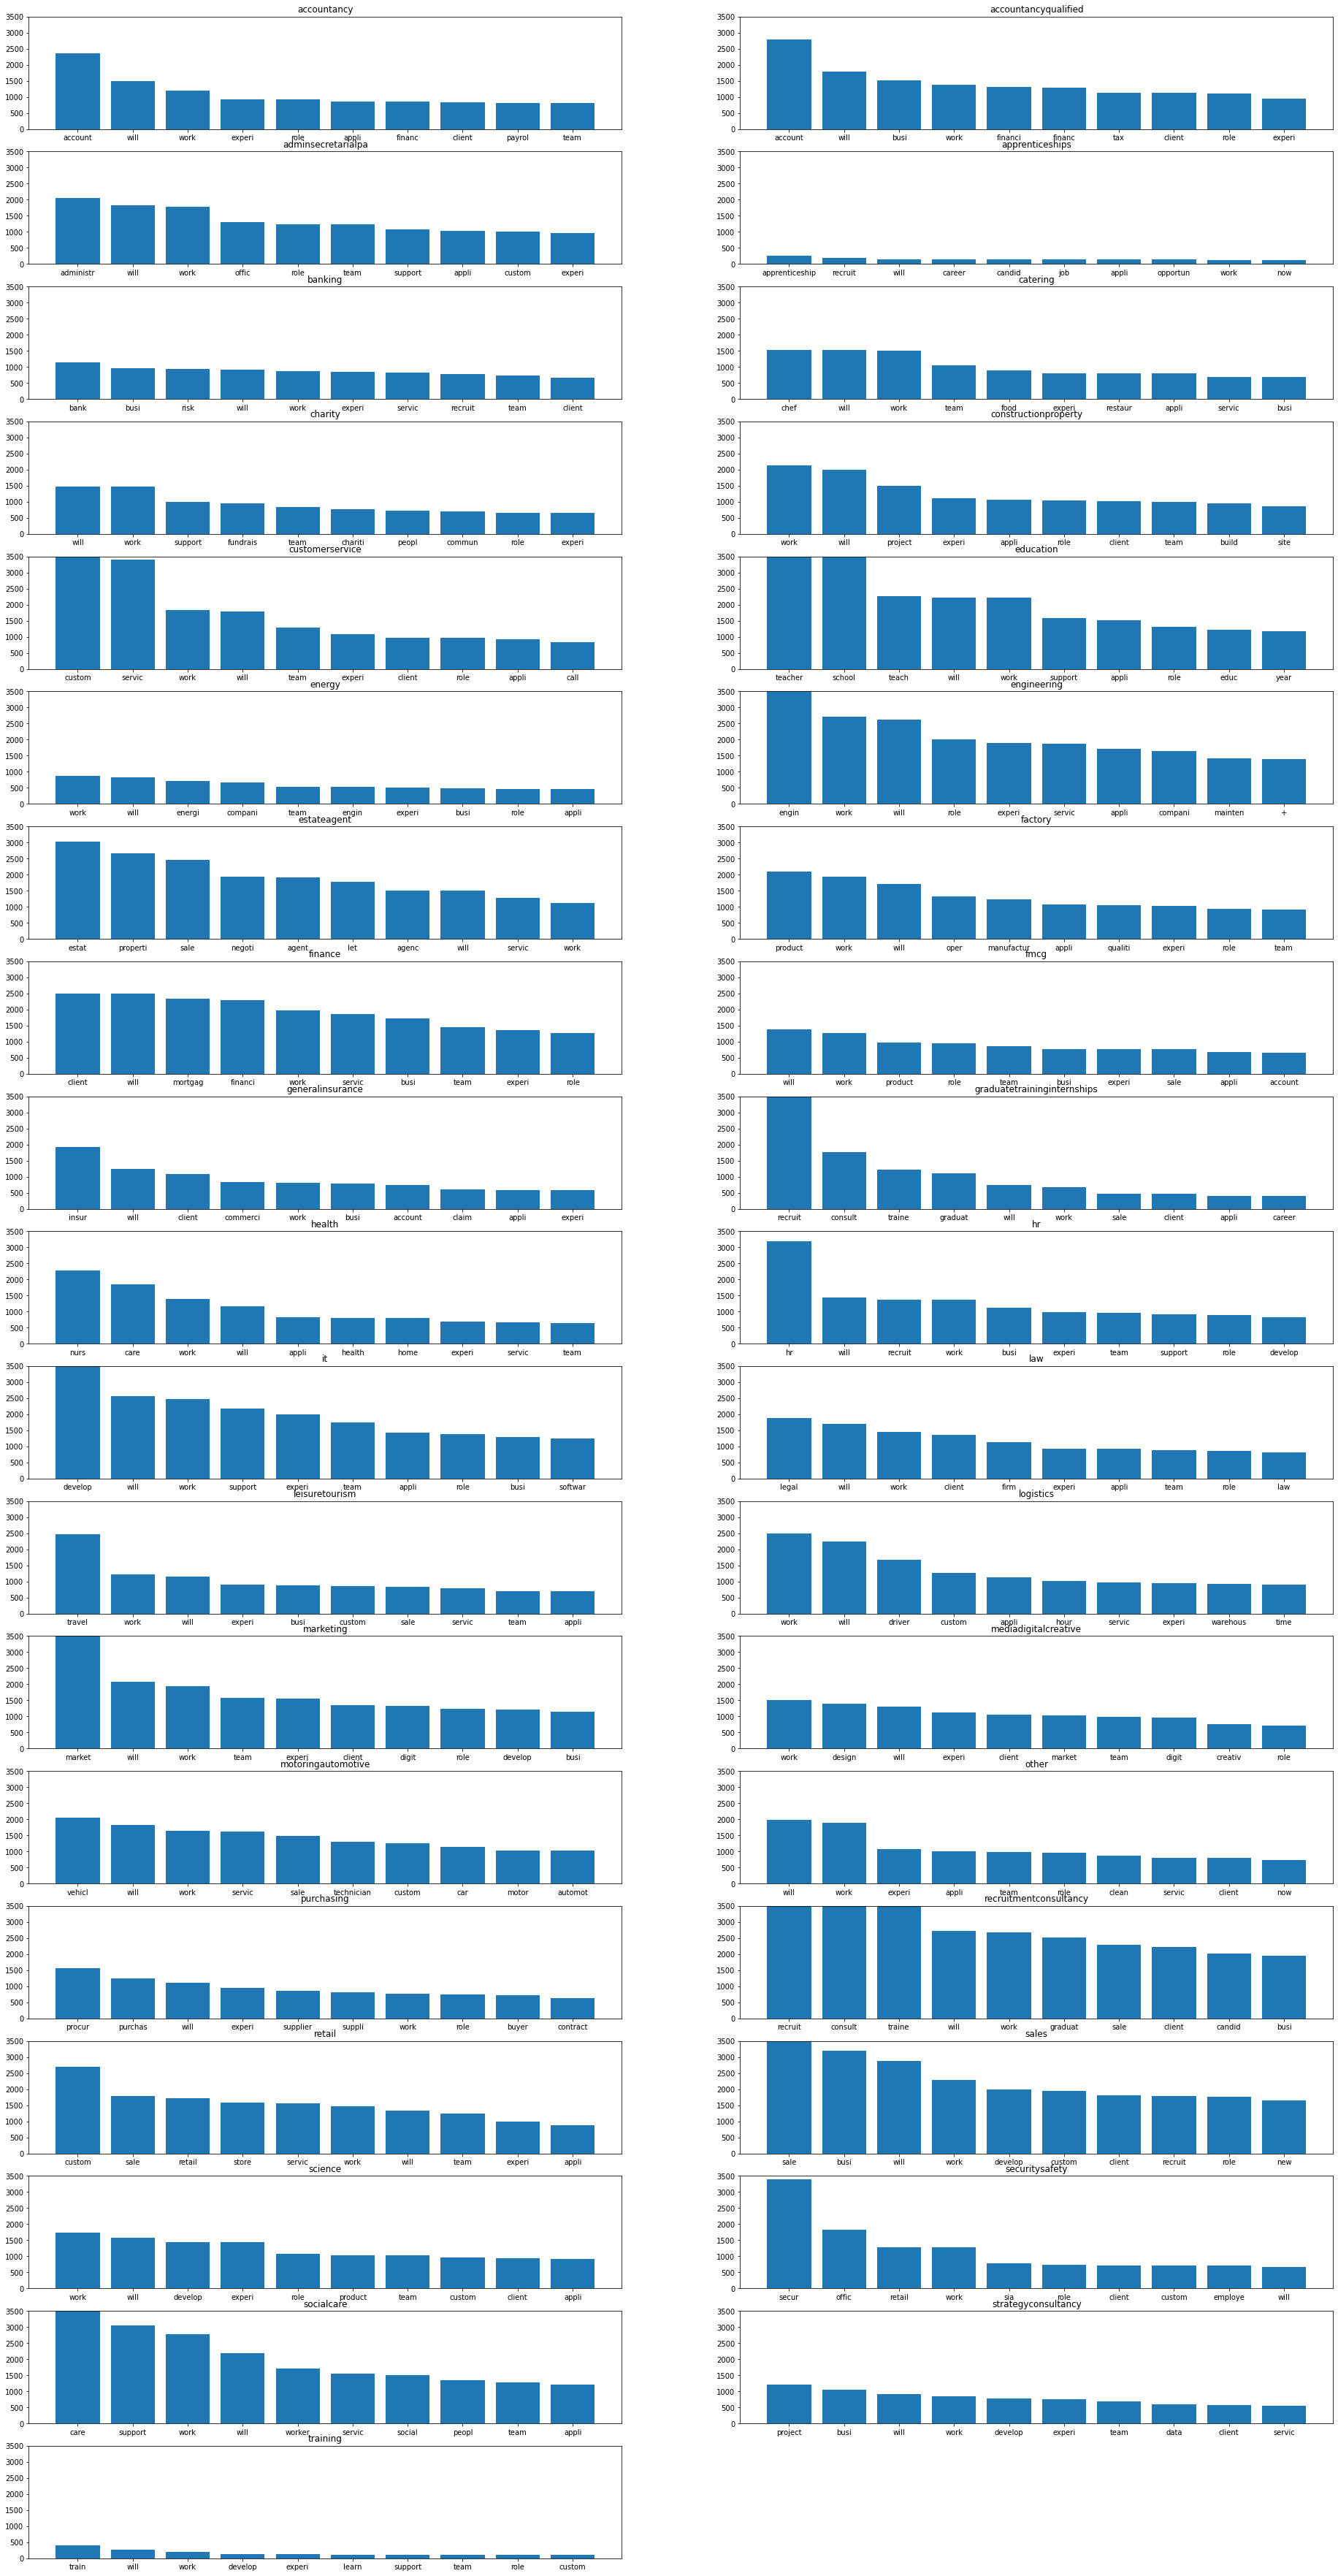

In [13]:
fig = plt.figure(figsize=(32, 64))

for i, category in enumerate(categories):
    wf = wordfreq(df_categories[i])

    fig.add_subplot(19, 2, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 3500)

plt.show()
plt.close()

In [14]:
df2.to_csv('CleanResume(3).csv', index=False)

After saving the cleaned resume, I try to shuffle it again (using Ms.Excel) for better distribution

# Bulding Model

In [15]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [16]:
with open("CleanResume(3).csv", encoding='utf8') as csvfile: #the csv file is not using the CP1252 encoding so I have to specify, 
                                                            #let's try to specify with the commonn encoding='utf8'
    print(f"First line (header) looks like this:\n\n{csvfile.readline()}")
    print(f"Each data point looks like this:\n\n{csvfile.readline()}")

First line (header) looks like this:

Category,Requirements

Each data point looks like this:

law,legal secretari admin assist appli now castl solicitor look part full time legal secretari admin assist join team hurstpierpoint work across multipl depart flexibl work hour avail ideal 20+ hour week essenti microsoft excel competent commun client via email telephoneorganis good time management work independ part teamgcs math english c desir not essenti full train will given legal background qualificationsprevi offic experienceexperi case system role commun client creat appoint gener diari managementopen close filegener correspond client third partiesdraft legal documentstyp dictationgener admin role admin case correspond legal solicitor



In [17]:
def parse_data_from_file(filename): # Extracts sentences and labels from a CSV file and returns sentences, labels
    sentences = []
    labels = []
    with open(filename, encoding='utf8') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        next(reader)
        for row in reader:
            labels.append(row[0])
            sentences.append(row[1])

    return sentences, labels

In [18]:
sentences, labels = parse_data_from_file("CleanResume(3).csv")

print(f"There are {len(sentences)} sentences in the dataset.\n")
print(f"First sentence has {len(sentences[0].split())} words.\n")
print(f"There are {len(labels)} labels in the dataset.\n")
print(f"The first 5 labels are {labels[:5]}, the dataset has been shuffled!")

There are 20548 sentences in the dataset.

First sentence has 88 words.

There are 20548 labels in the dataset.

The first 5 labels are ['law', 'motoringautomotive', 'law', 'motoringautomotive', 'catering'], the dataset has been shuffled!


## Some variable for easy adjustement

In [19]:
MAXLEN = 100
PADDING = 'post'
OOV_TOKEN = "<OOV>"
TRAINING_SPLIT = .78

## Let's split the lists of sentences and labels into training and validation

In [20]:
def train_val_split(sentences, labels, training_split):
    # Compute the number of sentences that will be used for training
    train_size = int(len(labels)*training_split)

    # Split the sentences and labels into train/validation splits
    train_sentences = sentences[:train_size]
    train_labels = labels[:train_size]

    validation_sentences = sentences[train_size:]
    validation_labels = labels[train_size:]
    
    return train_sentences, validation_sentences, train_labels, validation_labels

In [21]:
train_sentences, val_sentences, train_labels, val_labels = train_val_split(sentences, labels, TRAINING_SPLIT)

print(f"There are {len(train_sentences)} sentences for training.\n")
print(f"There are {len(train_labels)} labels for training.\n")
print(f"There are {len(val_sentences)} sentences for validation.\n")
print(f"There are {len(val_labels)} labels for validation.")

There are 16027 sentences for training.

There are 16027 labels for training.

There are 4521 sentences for validation.

There are 4521 labels for validation.


## Tokenize

In [22]:
def fit_tokenizer(train_sentences, oov_token):
    tokenizer = Tokenizer(oov_token=oov_token)
    tokenizer.fit_on_texts(train_sentences) # Fit the tokenizer to the training sentences

    return tokenizer

In [23]:
tokenizer = fit_tokenizer(train_sentences, OOV_TOKEN)
word_index = tokenizer.word_index
VOCAB_SIZE = len(word_index)

print(f"Vocabulary contains {VOCAB_SIZE} words")
print("with <OOV> token included" if "<OOV>" in word_index else "<OOV> token NOT included in vocabulary")

Vocabulary contains 64135 words
with <OOV> token included


In [24]:
def seq_and_pad(sentences, tokenizer, padding, maxlen):
    sequences = tokenizer.texts_to_sequences(sentences) # Convert sentence to sequence
    padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding=padding)
    
    return padded_sequences

In [25]:
train_padded_seq = seq_and_pad(train_sentences, tokenizer, PADDING, MAXLEN)
val_padded_seq = seq_and_pad(val_sentences, tokenizer, PADDING, MAXLEN)

print(f"Padded training sequences have shape: {train_padded_seq.shape}")
print(f"Padded validation sequences have shape: {val_padded_seq.shape}")

Padded training sequences have shape: (16027, 100)
Padded validation sequences have shape: (4521, 100)


In [26]:
def tokenize_labels(all_labels, split_labels):
    label_tokenizer = Tokenizer()
    label_tokenizer.fit_on_texts(all_labels)
    label_word_index = label_tokenizer.word_index
    label_seq = label_tokenizer.texts_to_sequences(split_labels) # Save the sequences
    label_seq_np = np.array(label_seq) - 1 # Keras usually expects the labels to start at 0
                                            # So, we subtract each labelling by 1 since tokenizer is start at 1
    
    return label_seq_np, label_word_index

In [27]:
# Test your function
train_label_seq, label_word_index = tokenize_labels(labels, train_labels)
val_label_seq, label_word_index = tokenize_labels(labels, val_labels)

print(f"Label vocabulary contains {len(label_word_index)} words")
print(f"First 10 labels of the training set should look like this:\n{train_label_seq[:10]}\n")
print(f"First 10 labels of the validation set should look like this:\n{val_label_seq[:10]}\n")
print(f"Tokenized labels of the training set have shape: {train_label_seq.shape}")
print(f"Tokenized labels of the validation set have shape: {val_label_seq.shape}")

Label vocabulary contains 37 words
First 10 labels of the training set should look like this:
[[21]
 [15]
 [21]
 [15]
 [20]
 [18]
 [20]
 [21]
 [15]
 [18]]

First 10 labels of the validation set should look like this:
[[ 0]
 [11]
 [ 0]
 [ 0]
 [11]
 [ 0]
 [17]
 [11]
 [11]
 [ 0]]

Tokenized labels of the training set have shape: (16027, 1)
Tokenized labels of the validation set have shape: (4521, 1)


## Text classification model

In [28]:
EMBEDDING_DIM = 32

In [29]:
tf.random.set_seed(123)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=VOCAB_SIZE+1, output_dim=EMBEDDING_DIM, input_length=MAXLEN, mask_zero=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(37, activation='softmax')])

model.compile(loss='sparse_categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [30]:
history = model.fit(train_padded_seq, train_label_seq, epochs=10, validation_data=(val_padded_seq, val_label_seq))

Epoch 1/10
501/501 [==============================] - 49s 64ms/step - loss: 3.3290 - accuracy: 0.1869 - val_loss: 3.3258 - val_accuracy: 0.1013
Epoch 2/10
501/501 [==============================] - 27s 55ms/step - loss: 2.0980 - accuracy: 0.4486 - val_loss: 2.7005 - val_accuracy: 0.2776
Epoch 3/10
501/501 [==============================] - 28s 56ms/step - loss: 1.6000 - accuracy: 0.5769 - val_loss: 2.2305 - val_accuracy: 0.4074
Epoch 4/10
501/501 [==============================] - 28s 55ms/step - loss: 1.3425 - accuracy: 0.6505 - val_loss: 2.0075 - val_accuracy: 0.4762
Epoch 5/10
501/501 [==============================] - 28s 56ms/step - loss: 1.1605 - accuracy: 0.6941 - val_loss: 1.8782 - val_accuracy: 0.5163
Epoch 6/10
501/501 [==============================] - 27s 55ms/step - loss: 1.0612 - accuracy: 0.7187 - val_loss: 1.8689 - val_accuracy: 0.5309
Epoch 7/10
501/501 [==============================] - 27s 55ms/step - loss: 0.9749 - accuracy: 0.7393 - val_loss: 1.7201 - val_accuracy:

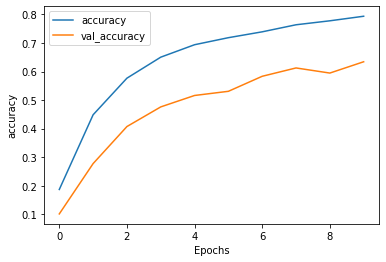

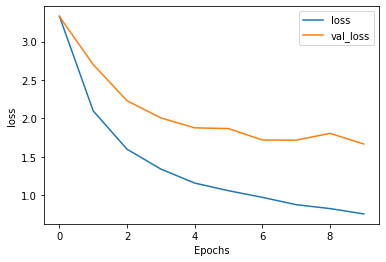

In [31]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [32]:
pytesseract.tesseract_cmd = (r'C:\Program Files\Tesseract-OCR\tesseract.exe')

In [33]:
img_pred = 'material/resume.jpg'

In [34]:
img = cv2.imread(img_pred)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
threshold_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

In [35]:
custom_config = r'--oem 3 --psm 6'

details = pytesseract.image_to_data(image=threshold_img,
                                    output_type=Output.DICT, 
                                    config=custom_config, 
                                    lang='eng')

In [36]:
teks_raw = [word.lower() for word in details['text'] if word.isalnum()]
teks_raw[:10]

['abigail',
 'berns',
 '4998',
 'battery',
 'apt',
 'md',
 '20814',
 'education',
 'smith',
 'northampton']

In [37]:
sample_text = ' '.join(teks_raw)
sample_text

'abigail berns 4998 battery apt md 20814 education smith northampton ma bachelor of arts in biological sciences may 2012 awarded stride research scholarship with steven jackson college school of biomedical and health junior semester abroad research laboratory experience research laboratory of parasitic diseases national institute of allergy and infectious md recipient of intramural research training award e manage care and treatment of 40 including injection and assistance during mri quantitative analysis of experimental data develop rat infection model for taenia crassiceps perform steriotaxic neurosurgery on rats to implant taenia crassiceps metacestodes design and present academic and experimental results research summer research fellows program biology smith college developed test to quantify biofilm formation of coli trained and supervised first year research student community health experience communicable disease control boston public health commission e adjusted state response 

In [38]:
# sample_text = 'justine hendrickson senior computer vision scientist senior computer vision scientist with 10 years of experience working with data and data sets of varying size and complexity as a seasoned computer scientist am looking to continue my career ina senior or directorlevel position with abcellera work experience abcellera computer vision scientist remote july 2014 current developed 13 monitoring features using computer vision and a variety of other machine learning methods designed data collection protocols and annotation guidelines in collaboration with 3 data teams investigated tradeoffs between accuracy and computational efficiency for edgeembedded environments developed and maintained kpi reports for 6 teams to measure and analyze model performance contributed to smart eyes shared machine learning infrastructure including data preparation and model training microsoft it data scientist vancouver bc january 2012 june 2014 designed 6 predictive modeling projects to address specific business problems determined by consultation with business partners worked with 1100 data sets of varying degrees of size and complexity including both structured and unstructured data developed 36 proprietary algorithms to build customized solutions that led to innovative solutions developed 70 sophisticated visualizations of analysis outputs for key business users and stakeholders swiss re associate data scientist toronto canada may 2012 may 2014 developed skills that leveraged data science methodologies to solve 6 business problems and provide strategic insights designed and developed 34 algorithms and models to use against large datasets to create business insights supported 17 data science projects by conducting effective analyses to solve business problems communicated insights and recommendations to both technical and nontechnical audiences justhemailcom 123 4567890 vancouver bc inkedl iwitter skills snowflake python ch r sql tableau pytorch education bs engineering university of british columbia september 2009 may 2013 vancouver bc certifications master deep learning cnn ssd yolo gans computer vision az'

def predict_category(resume_text):
    preprocessed_text = preprocess(resume_text)
    
    resume_seq = tokenizer.texts_to_sequences([preprocessed_text]) # Convert sentence to sequence
    padded_resume = pad_sequences(resume_seq, maxlen=MAXLEN, padding=PADDING)
    
    predicted_probabilities = model.predict(padded_resume)
    predicted_category = np.argmax(predicted_probabilities)
    
    predicted_label = categories[predicted_category]
    
    return predicted_label

In [39]:
prediction = predict_category(sample_text)
print(prediction)

1/1 [==============================] - 5s 5s/step
leisuretourism


In [40]:
model.save("ModelCV.h5")